# WeatherPy

## Setup

In [1]:
from citipy import citipy
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import time

/Users/tyler/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Establish the API key

In [2]:
from api_keys import weather_api_key

### Generate the list of cities

In [3]:
latitudes = np.random.uniform(-90, 90, size=1500)
longitudes = np.random.uniform(-180, 180, size=1500)
coords = zip(latitudes, longitudes)

cities = []
for coord in coords:
    city_name = citipy.nearest_city(coord[0], coord[1]).city_name
    if city_name not in cities:
        cities.append(city_name)

num_of_cities = len(cities)
print(f"num_of_cities: {num_of_cities}")

num_of_cities: 578


## Generate plots

### Get the data

In [4]:
API_url = "https://api.openweathermap.org/data/2.5/weather"

city_data = []

entries_per_set = 10
total_sets = num_of_cities / entries_per_set
set_count = 1
for i, city in enumerate(cities):

    city_url = f"{API_url}?q={city}&appid={weather_api_key}"
    
    # logging
    if i % entries_per_set == 0:
        print(f"Beginning set #{set_count} of ~{total_sets}")
        set_count += 1

    try:

        # make request
        response = requests.get(city_url)
        data = response.json()

        # get data
        city_lat = data["coord"]["lat"]
        city_lon = data["coord"]["lon"]
        city_max_temp = data["main"]["temp_max"]
        city_humidity = data["main"]["humidity"]
        city_clouds = data["clouds"]["all"]
        city_wind = data["wind"]["speed"]
        city_country = data["sys"]["country"]
        city_date = data["dt"]

        # store data
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lon": city_lon,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except:
        print("Skipping city...")
        pass

    # avoid rate limiting
    time.sleep(1)

print("Done!")

Beginning set #1 of ~57.8
Beginning set #2 of ~57.8
Beginning set #3 of ~57.8
Beginning set #4 of ~57.8
Beginning set #5 of ~57.8
Beginning set #6 of ~57.8
Beginning set #7 of ~57.8
Beginning set #8 of ~57.8
Skipping city...
Beginning set #9 of ~57.8
Beginning set #10 of ~57.8
Beginning set #11 of ~57.8
Skipping city...
Beginning set #12 of ~57.8
Skipping city...
Beginning set #13 of ~57.8
Beginning set #14 of ~57.8
Beginning set #15 of ~57.8
Beginning set #16 of ~57.8
Beginning set #17 of ~57.8
Beginning set #18 of ~57.8
Skipping city...
Beginning set #19 of ~57.8
Beginning set #20 of ~57.8
Beginning set #21 of ~57.8
Beginning set #22 of ~57.8
Skipping city...
Beginning set #23 of ~57.8
Beginning set #24 of ~57.8
Skipping city...
Beginning set #25 of ~57.8
Skipping city...
Beginning set #26 of ~57.8
Beginning set #27 of ~57.8
Beginning set #28 of ~57.8
Beginning set #29 of ~57.8
Beginning set #30 of ~57.8
Skipping city...
Beginning set #31 of ~57.8
Skipping city...
Beginning set #32 o

### Create the DataFrame and save a .csv file

In [5]:
df = pd.DataFrame(city_data)

df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,al bayda',32.7627,21.7551,282.42,51,100,4.99,LY,1739579436
1,tvoroyri,61.5556,-6.8111,278.94,71,100,10.57,FO,1739579437
2,udachny,66.4167,112.4000,237.26,100,92,0.98,RU,1739579438
3,jamestown,42.0970,-79.2353,265.95,72,0,0.00,US,1739579184
4,tucuma,-0.1833,-50.0500,297.48,95,100,3.40,BR,1739579441


In [6]:
df.to_csv("data/cities.csv", index_label="City_ID")

In [7]:
df = pd.read_csv("data/cities.csv", index_col="City_ID")

df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,al bayda',32.7627,21.7551,282.42,51,100,4.99,LY,1739579436
1,tvoroyri,61.5556,-6.8111,278.94,71,100,10.57,FO,1739579437
2,udachny,66.4167,112.4000,237.26,100,92,0.98,RU,1739579438
3,jamestown,42.0970,-79.2353,265.95,72,0,0.00,US,1739579184
4,tucuma,-0.1833,-50.0500,297.48,95,100,3.40,BR,1739579441


### Create and save plots (relations with Latitude)

#### Max Temperature vs. Latitude

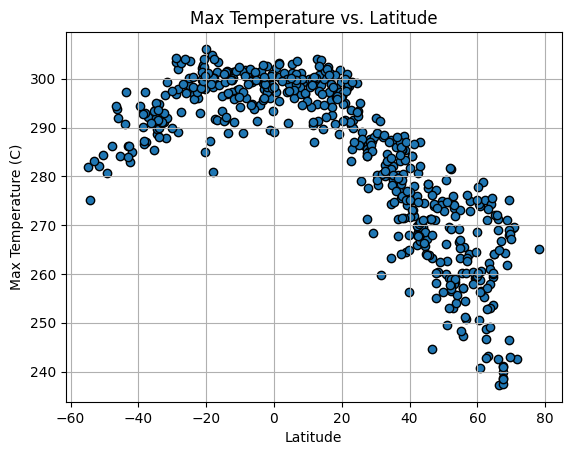

In [8]:
# plot
plt.scatter(df["Lat"], df["Max Temp"], edgecolors="black")

# formatting
plt.title("Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# show (and save)
plt.savefig("figs/Max Temperature vs. Latitude.png")
plt.show()

#### Humidity vs. Latitude

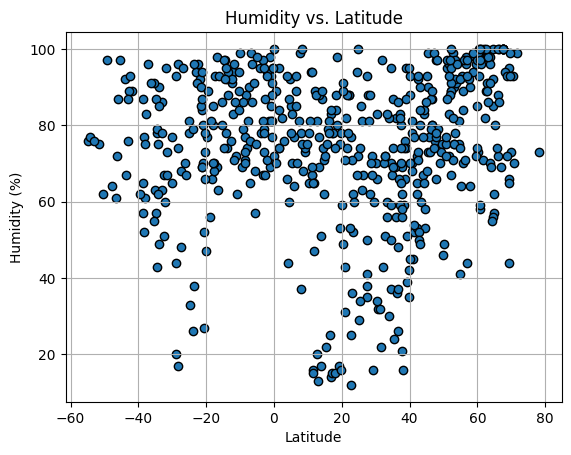

In [9]:
# plot
plt.scatter(df["Lat"], df["Humidity"], edgecolors="black")

# formatting
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# show (and save)
plt.savefig("figs/Humidity vs. Latitude.png")
plt.show()

#### Cloudiness vs. Latitude

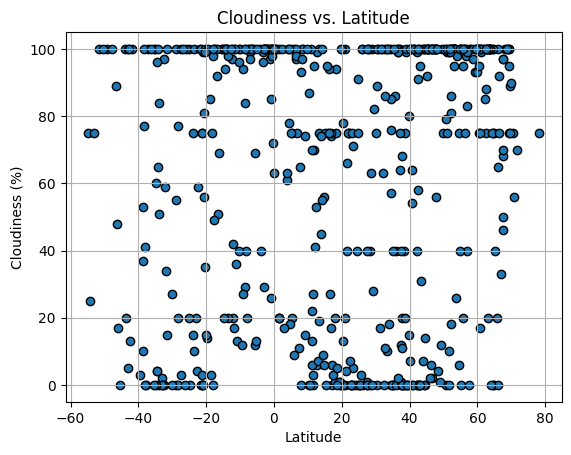

In [10]:
# plot
plt.scatter(df["Lat"], df["Cloudiness"], edgecolors="black")

# formatting
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# show (and save)
plt.savefig("figs/Cloudiness vs. Latitude.png")
plt.show()

#### Wind Speed vs. Latitude

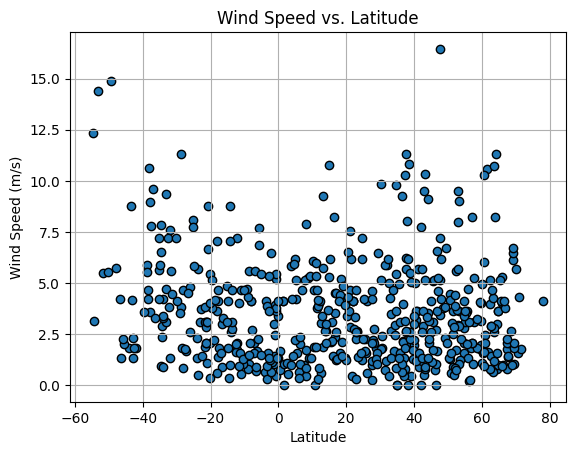

In [11]:
# plot
plt.scatter(df["Lat"], df["Wind Speed"], edgecolors="black")

# formatting
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# show (and save)
plt.savefig("figs/Wind Speed vs. Latitude.png")
plt.show()

### Create and save plots (linear regressions)

#### Function and DataFrames

In [12]:
def plot_linear_regressions(x, y, title="title", xlabel="xlabel", ylabel="ylabel"):

    # plot
    plt.scatter(x, y)
    # also linear regression
    slope, intercept, r_value, _, _ = linregress(x, y)
    plt.plot(x, slope * x + intercept, color="red")
    plt.text(x.min(), y.min(), f"y={slope:.2f}x+{intercept:.2f}", fontsize=14, color="red")
    print(f"The r^2-value is {round(r_value**2, 2)}")

    # formatting
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # show
    plt.show()

In [13]:
df_northern = df[df["Lat"] >= 0]

df_northern.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,al bayda',32.7627,21.7551,282.42,51,100,4.99,LY,1739579436
1,tvoroyri,61.5556,-6.8111,278.94,71,100,10.57,FO,1739579437
2,udachny,66.4167,112.4000,237.26,100,92,0.98,RU,1739579438
3,jamestown,42.0970,-79.2353,265.95,72,0,0.00,US,1739579184
5,thompson,55.7435,-97.8558,247.24,70,20,3.60,CA,1739579190


In [14]:
df_southern = df[df["Lat"] < 0]

df_southern.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,tucuma,-0.1833,-50.0500,297.48,95,100,3.40,BR,1739579441
7,waitangi,-43.9535,-176.5597,290.83,92,100,1.79,NZ,1739579444
10,adamstown,-25.0660,-130.1015,298.76,81,100,8.10,PN,1739579448
11,puerto natales,-51.7236,-72.4875,282.06,75,100,5.46,CL,1739579449
15,callao,-12.0667,-77.1500,301.33,83,20,7.20,PE,1739579284


#### Plots

##### Max Temperature vs. Latitude

The r^2-value is 0.76


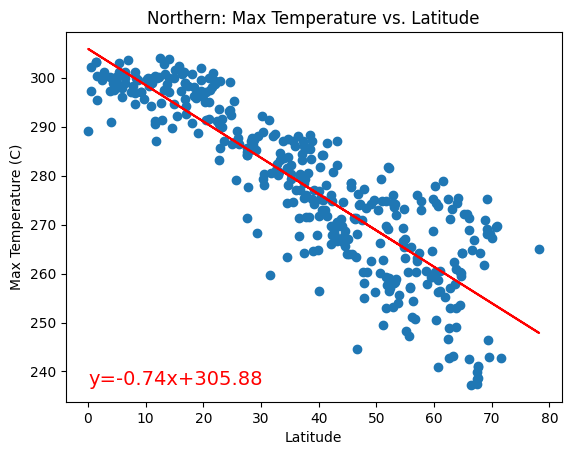

In [15]:
plot_linear_regressions(df_northern["Lat"], df_northern["Max Temp"], title="Northern: Max Temperature vs. Latitude", xlabel="Latitude", ylabel="Max Temperature (C)")

The r^2-value is 0.35


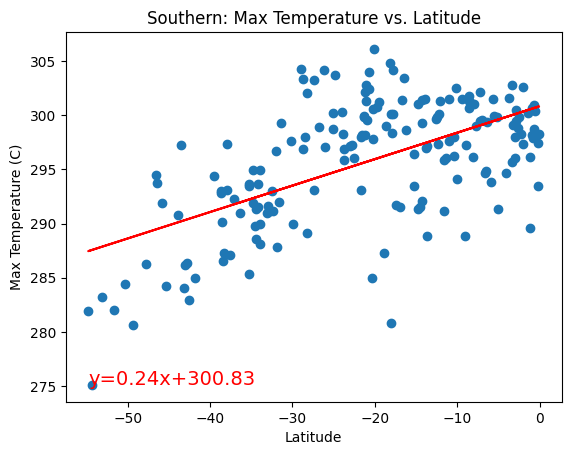

In [16]:
plot_linear_regressions(df_southern["Lat"], df_southern["Max Temp"], title="Southern: Max Temperature vs. Latitude", xlabel="Latitude", ylabel="Max Temperature (C)")

* Northern: as the latitude goes up, the maximum temperature goes down (r^2 value is .75)
* Southern: as the latitude goes down, the maximum temperature goes down but less consistently (r^2 value is .36)

##### Humidity vs. Latitude

The r^2-value is 0.09


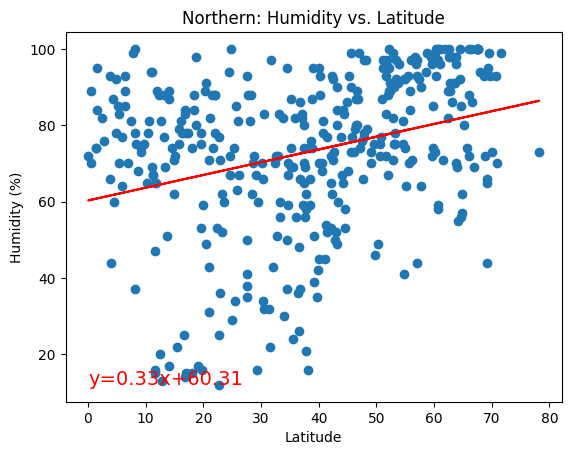

In [17]:
plot_linear_regressions(df_northern["Lat"], df_northern["Humidity"], title="Northern: Humidity vs. Latitude", xlabel="Latitude", ylabel="Humidity (%)")

The r^2-value is 0.06


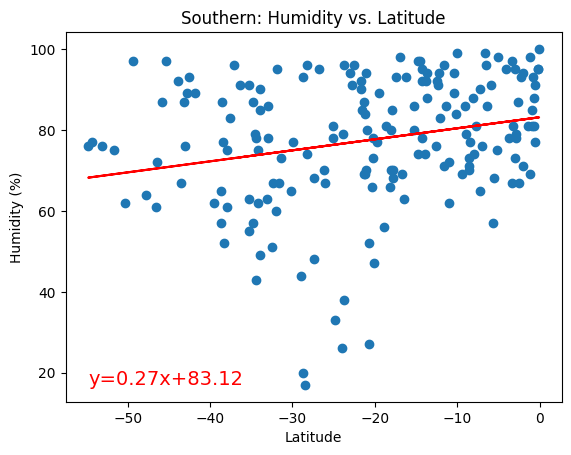

In [18]:
plot_linear_regressions(df_southern["Lat"], df_southern["Humidity"], title="Southern: Humidity vs. Latitude", xlabel="Latitude", ylabel="Humidity (%)")

* Northern: as the latitude goes up, the humidity goes up but inconsistently (r^2 value is .09)
* Southern: as the latitude goes down, the humidity goes down but inconsistently (r^2 value is .13)

##### Cloudiness vs. Latitude

The r^2-value is 0.07


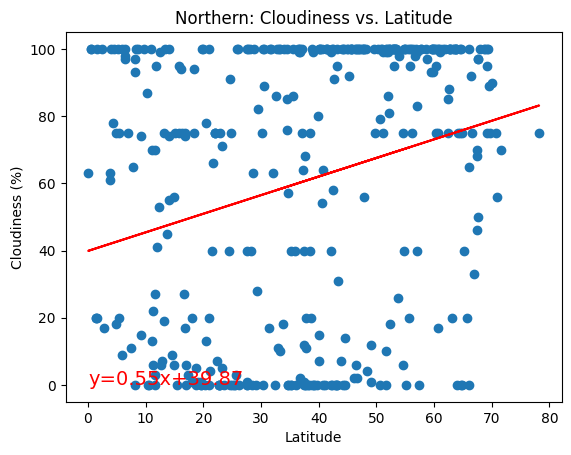

In [19]:
plot_linear_regressions(df_northern["Lat"], df_northern["Cloudiness"], title="Northern: Cloudiness vs. Latitude", xlabel="Latitude", ylabel="Cloudiness (%)")

The r^2-value is 0.08


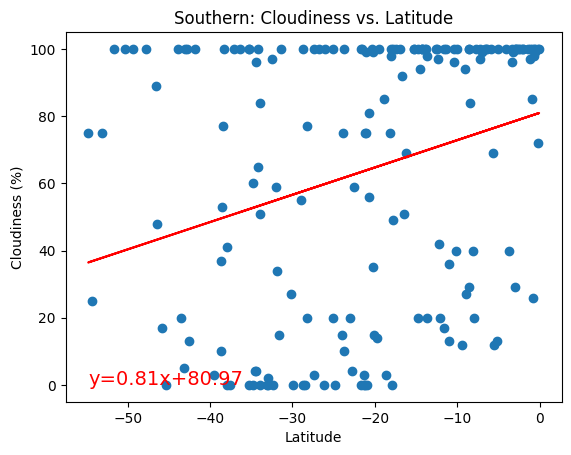

In [20]:
plot_linear_regressions(df_southern["Lat"], df_southern["Cloudiness"], title="Southern: Cloudiness vs. Latitude", xlabel="Latitude", ylabel="Cloudiness (%)")

* Northern: as the latitude goes up, the cloudiness goes up but inconsistently (r^2 value is .05)
* Southern: as the latitude goes down, the cloudiness goes down but inconsistently (r^2 value is .03)

##### Wind Speed vs. Latitude

The r^2-value is 0.0


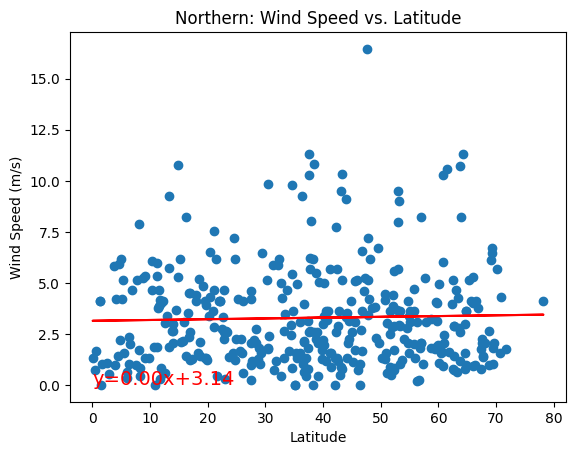

In [21]:
plot_linear_regressions(df_northern["Lat"], df_northern["Wind Speed"], title="Northern: Wind Speed vs. Latitude", xlabel="Latitude", ylabel="Wind Speed (m/s)")

The r^2-value is 0.14


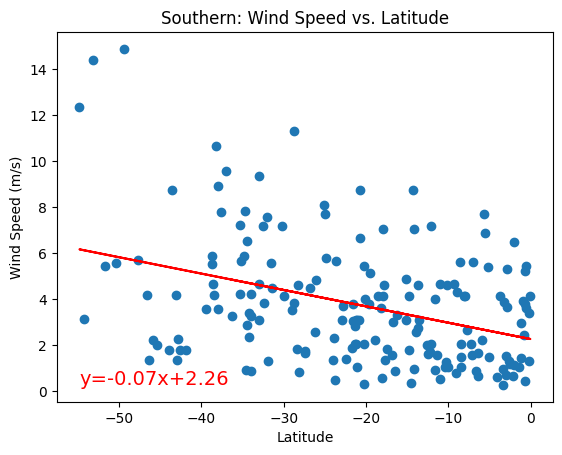

In [22]:
plot_linear_regressions(df_southern["Lat"], df_southern["Wind Speed"], title="Southern: Wind Speed vs. Latitude", xlabel="Latitude", ylabel="Wind Speed (m/s)")

* Northern: as the latitude goes up, the wind speed goes down but inconsistently (r^2 value is 0)
* Southern: as the latitude goes down, the cloudiness goes up but inconsistently (r^2 value is .11)